In [ ]:
# Importing necessary libraries and modules
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from utils import create_conditions
import matplotlib.pyplot as plt

In [ ]:
# Load data
cases = pd.read_csv("./data/covid/africa_daily_time_series_cases.csv")
deaths = pd.read_csv("./data/covid/africa_daily_time_series_deaths.csv")
recoveries = pd.read_csv("./data/covid/africa_daily_time_series_recovered.csv")

In [ ]:
# cases[(cases.iloc[:, 3:13].columns > 0).any(axis=1)]
first_month_cases = cases.loc[:, cases.iloc[:,3:13].columns.values]
first_month_cases[(first_month_cases > 0).all(1)]



In [ ]:
dates = pd.to_datetime(cases.iloc[:, 3:,].columns.values).to_series()
month_end_dates = dates.groupby(dates.index.month).apply(lambda x: x.index.max())
month_end_dates = month_end_dates.apply(lambda x: x.strftime('%-m/%d/%y')).to_numpy()
# pd.to_datetime(month_end_dates, format='%d/%m/%Y')

In [ ]:
selected_columns = np.insert(month_end_dates, 0, ['Country/Region'])
month_end_stats =  cases[selected_columns]
month_end_stats['TotalCases'] =  month_end_cases.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats['TotalDeaths'] =  deaths.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats['TotalRecoveries'] =  recoveries.apply(lambda x: x[month_end_dates].sum(), axis=1)
month_end_stats.plot.bar(x='Country/Region', y=['TotalCases', 'TotalDeaths', 'TotalRecoveries'])





<AxesSubplot:xlabel='Country/Region'>

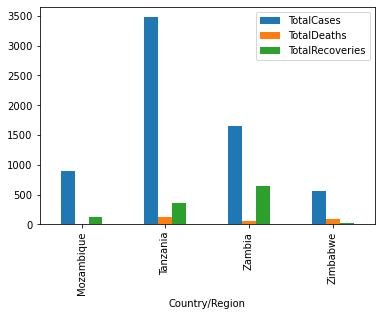

In [146]:
neighbour_countries = ['Zambia', 'Mozambique', 'Tanzania', 'Zimbabwe']
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours = cases[cases['Country/Region'].isin(neighbour_countries)].iloc[:,3:,]
neighbours['TotalCases'] = neighbours.apply(lambda x: x.sum(), axis=1)
neighbours['TotalDeaths'] = deaths[deaths['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours['TotalRecoveries'] = recoveries[recoveries['Country/Region'].isin(neighbour_countries)].iloc[:,3:,].apply(lambda x: x.sum(), axis=1)
neighbours.insert(0, column='Country/Region', value=cases['Country/Region'])
neighbours.plot.bar(x='Country/Region', y=['TotalCases', 'TotalDeaths', 'TotalRecoveries'])

